<h1>Tutorial: Load datetime, timezone change, reindexing and aggregation</h1>

In [123]:
import pandas as pd

In [124]:
# Specifically indicate which column is datetime in order to recognize datetime
df_date = pd.read_csv('../input/timeseries.txt',index_col=0, parse_dates=[1])

In [125]:
# the date is datetime64[ns], otherwise date is just object type.
df_date.dtypes

date         datetime64[ns]
door_open             int64
dtype: object

In [126]:
df_date.head()

,date,door_open
temp,,
25,2014-01-22 13:11:22,1
33,2014-01-22 13:13:33,1
23,2014-01-22 13:15:33,1
22,2014-01-23 02:22:34,1
32,2014-01-23 02:34:00,1


In [127]:
# After setting up to UTC and then convert to Asia/Seoul
df_date['seoul_date'] = df_date.date.dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

In [128]:
df_date.head(10)

,date,door_open,seoul_date
temp,,,
25,2014-01-22 13:11:22,1,2014-01-22 22:11:22+09:00
33,2014-01-22 13:13:33,1,2014-01-22 22:13:33+09:00
23,2014-01-22 13:15:33,1,2014-01-22 22:15:33+09:00
22,2014-01-23 02:22:34,1,2014-01-23 11:22:34+09:00
32,2014-01-23 02:34:00,1,2014-01-23 11:34:00+09:00
10,2014-01-23 22:33:01,1,2014-01-24 07:33:01+09:00
12,2014-01-23 23:11:02,1,2014-01-24 08:11:02+09:00
13,2014-01-24 03:12:03,1,2014-01-24 12:12:03+09:00


In [129]:
# Truncate minutes and seconds, leaving yyyy-mm-dd hh
df_date['seoul_date_hour'] = df_date.seoul_date.dt.strftime('%Y-%m-%d %H:00:00')

In [130]:
df_date.head(10)

,date,door_open,seoul_date,seoul_date_hour
temp,,,,
25,2014-01-22 13:11:22,1,2014-01-22 22:11:22+09:00,2014-01-22 22:00:00
33,2014-01-22 13:13:33,1,2014-01-22 22:13:33+09:00,2014-01-22 22:00:00
23,2014-01-22 13:15:33,1,2014-01-22 22:15:33+09:00,2014-01-22 22:00:00
22,2014-01-23 02:22:34,1,2014-01-23 11:22:34+09:00,2014-01-23 11:00:00
32,2014-01-23 02:34:00,1,2014-01-23 11:34:00+09:00,2014-01-23 11:00:00
10,2014-01-23 22:33:01,1,2014-01-24 07:33:01+09:00,2014-01-24 07:00:00
12,2014-01-23 23:11:02,1,2014-01-24 08:11:02+09:00,2014-01-24 08:00:00
13,2014-01-24 03:12:03,1,2014-01-24 12:12:03+09:00,2014-01-24 12:00:00


In [131]:
df_date.dtypes

date                           datetime64[ns]
door_open                               int64
seoul_date         datetime64[ns, Asia/Seoul]
seoul_date_hour                        object
dtype: object

In [132]:
# aggregate by hour
df_d_open = df_date.groupby('seoul_date_hour').agg({'door_open':sum})
df_d_open.head(10)


,door_open
seoul_date_hour,
2014-01-22 22:00:00,3
2014-01-23 11:00:00,2
2014-01-24 07:00:00,1
2014-01-24 08:00:00,1
2014-01-24 12:00:00,1


In [133]:
# check what kind of type an index is
# the type is object 
df_d_open.index

Index(['2014-01-22 22:00:00', '2014-01-23 11:00:00', '2014-01-24 07:00:00',
       '2014-01-24 08:00:00', '2014-01-24 12:00:00'],
      dtype='object', name='seoul_date_hour')

In [135]:
# convert the type of object to datetime64
df_d_open.index = pd.to_datetime(df_d_open.index)

In [136]:
df_d_open.index

DatetimeIndex(['2014-01-22 22:00:00', '2014-01-23 11:00:00',
               '2014-01-24 07:00:00', '2014-01-24 08:00:00',
               '2014-01-24 12:00:00'],
              dtype='datetime64[ns]', name='seoul_date_hour', freq=None)

In [153]:
# Get the last index value
end_index = df_d_open.shape[0] - 1
print(df_d_open.index[0])
print(df_d_open.index[end_index])



2014-01-22 22:00:00
2014-01-24 12:00:00


In [167]:
# get a range of start and end
all_times = pd.date_range(df_d_open.index[0],df_d_open.index[end_index], freq = "H").floor('H')

In [168]:
# fill 0 for the new records
df_all = df_d_open.reindex(all_times, fill_value=0)
# Set to an index name
df_all.index.name = "seoul_date"

In [169]:
df_all.head(10)

,door_open
seoul_date,
2014-01-22 22:00:00,3
2014-01-22 23:00:00,0
2014-01-23 00:00:00,0
2014-01-23 01:00:00,0
2014-01-23 02:00:00,0
2014-01-23 03:00:00,0
2014-01-23 04:00:00,0
2014-01-23 05:00:00,0
2014-01-23 06:00:00,0


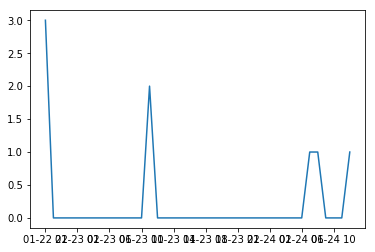

In [170]:
# draw a plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df_all)
plt.show()

In [172]:
# Save to csv file
df_all.to_csv('../input/timeseries_agg.txt')

Ref:<br>
[1] Summarising, Aggregating, and Grouping data in Python Pandas, https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ <br>
[2] Pandas reindex datetimeindex keeping existing values, 
https://stackoverflow.com/questions/48378107/pandas-reindex-datetimeindex-keeping-existing-values
